# Config

In [ ]:
# Config
download_faces_from_drive = False
download_vgg_weights = True
base_images_dir = "/content/drive/My Drive/vggear/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.applications.vggface import VGGFace

import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from collections import Counter

import tensorflow as tf
from tensorflow import keras

from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.utils import load_img, save_img, img_to_array, to_categorical

from keras.optimizers.optimizer_v1 import Optimizer
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, GlobalAveragePooling2D

# Downloads

In [ ]:
if download_faces_from_drive or download_vgg_weights:
  from google.colab import drive
  drive.mount('/content/drive')

if download_faces_from_drive:
  !cp -r "/content/drive/My Drive/faces_fei/" "faces/"

if download_vgg_weights:
  !cp "/content/drive/My Drive/vgg_face_weights.h5" "./vgg_face_weights.h5"

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/My Drive/faces_georgia/" "/content"

In [ ]:
!cp "/content/drive/My Drive/vgg_face_weights.h5" "./vgg_face_weights.h5"

# Load Images

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/ears_2/dataset/',
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/ears_2/dataset/',
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/ears_2/test_dataset/',
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator
preprocess_datagen = ImageDataGenerator(rescale=1./127.5)
def preprocess_image(image_path):
  img = load_img(image_path, target_size=(224, 224))
  img = img_to_array(img)
  #img = datagen.standardize(img)
  #img = img + 0.5
  #img = np.clip(img, 0, 1)
  # img = np.expand_dims(img, axis=0)
  
  #preprocess_input normalizes input in scale of [-1, +1]. You must apply same normalization in prediction.
  #Ref: https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py (Line 45)
  img = preprocess_input(img)

  return img

data_augmentation = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)])

In [ ]:
from os import listdir
import re

faces = listdir(base_images_dir)
faces_1 = sorted([s for s in faces if re.compile('s\d?\d?\d_1.jpg').match(s)])
faces_2 = sorted([s for s in faces if re.compile('s\d?\d?\d_2.jpg').match(s)])
faces_3 = sorted([s for s in faces if re.compile('s\d?\d?\d_3.jpg').match(s)])
faces_4 = sorted([s for s in faces if re.compile('s\d?\d?\d_4.jpg').match(s)])
faces_5 = sorted([s for s in faces if re.compile('s\d?\d?\d_5.jpg').match(s)])
#faces_6 = sorted([s for s in faces if re.compile('s\d?\d?\d_06.jpg').match(s)])
#faces_7 = sorted([s for s in faces if re.compile('s\d?\d?\d_07.jpg').match(s)])
#faces_8 = sorted([s for s in faces if re.compile('s\d?\d?\d_08.jpg').match(s)])
#faces_9 = sorted([s for s in faces if re.compile('s\d?\d?\d_09.jpg').match(s)])
#faces_10 = sorted([s for s in faces if re.compile('s\d?\d?\d_10.jpg').match(s)])
#faces_11 = sorted([s for s in faces if re.compile('s\d?\d?\d_11.jpg').match(s)])
#faces_12 = sorted([s for s in faces if re.compile('s\d?\d?\d_12.jpg').match(s)])
#faces_13 = sorted([s for s in faces if re.compile('s\d?\d?\d_13.jpg').match(s)])
#faces_14 = sorted([s for s in faces if re.compile('s\d?\d?\d_14.jpg').match(s)])
#faces_15 = sorted([s for s in faces if re.compile('s\d?\d?\d_15.jpg').match(s)])
ids_ears = [int(s.replace("s", "").split("_")[0]) for s in faces_1]
subjects = list(zip(ids_ears, faces_1, faces_2, faces_3, faces_4, faces_5))#, faces_6, faces_7,faces_8,faces_9,faces_10,faces_11,faces_12,faces_13,faces_14,faces_15))
subjects = sorted(subjects, key=lambda x: x[0])[:100]
print(ids_ears)
print(len(subjects))
print(subjects[0])
print([s[0] for s in subjects])

In [ ]:
a = preprocess_image(f'{base_images_dir}s100_1.jpg')

In [ ]:
plt.imshow(a)

In [ ]:
X_train = []
y_train = []

for subject in subjects:
  ids_ear, faces_1, faces_2, faces_3, faces_4, faces_5 = subject#, faces_6, faces_7,faces_8,faces_9,faces_10,faces_11,faces_12,faces_13,faces_14,faces_15 = subject
  ids_ear = ids_ear - 1
  faces_1 = preprocess_image(f'{base_images_dir}{faces_1}')
  faces_2 = preprocess_image(f'{base_images_dir}{faces_2}')
  faces_3 = preprocess_image(f'{base_images_dir}{faces_3}')
  faces_4 = preprocess_image(f'{base_images_dir}{faces_4}')
  faces_5 = preprocess_image(f'{base_images_dir}{faces_5}')
  #faces_6 = preprocess_image(f'{base_images_dir}{faces_6}')
  #faces_7 = preprocess_image(f'{base_images_dir}{faces_7}')
  #faces_8 = preprocess_image(f'{base_images_dir}{faces_8}')
  #faces_9 = preprocess_image(f'{base_images_dir}{faces_9}')
  #faces_10 = preprocess_image(f'{base_images_dir}{faces_10}')
  #faces_11 = preprocess_image(f'{base_images_dir}{faces_11}')
  #faces_12 = preprocess_image(f'{base_images_dir}{faces_12}')
  #faces_13 = preprocess_image(f'{base_images_dir}{faces_13}')
  #faces_14 = preprocess_image(f'{base_images_dir}{faces_14}')
  #faces_15 = preprocess_image(f'{base_images_dir}{faces_15}')
  labels = [ids_ear] * 5

  X_train.append(faces_1)
  X_train.append(faces_2)
  X_train.append(faces_3)
  X_train.append(faces_4)
  X_train.append(faces_5)
  #X_train.append(faces_6)
  #X_train.append(faces_7)
  #X_train.append(faces_8)
  #X_train.append(faces_9)
  #X_train.append(faces_10)
  #X_train.append(faces_11)
  #X_train.append(faces_12)
  #X_train.append(faces_13)
  #X_train.append(faces_14)
  #X_train.append(faces_15)

  augmentation_rounds = 0
  for i in range(augmentation_rounds):
    faces_1_augmented = data_augmentation(faces_1, training=True)
    faces_2_augmented = data_augmentation(faces_2, training=True)
    faces_3_augmented = data_augmentation(faces_3, training=True)
    faces_4_augmented = data_augmentation(faces_4, training=True)
    faces_5_augmented = data_augmentation(faces_5, training=True)
    #faces_6_augmented = data_augmentation(faces_6, training=True)
    #faces_7_augmented = data_augmentation(faces_7, training=True)
    #faces_8_augmented = data_augmentation(faces_8, training=True)
    #faces_9_augmented = data_augmentation(faces_9, training=True)
    #faces_10_augmented = data_augmentation(faces_10, training=True)
    #faces_11_augmented = data_augmentation(faces_11, training=True)
    #faces_12_augmented = data_augmentation(faces_12, training=True)
    #faces_13_augmented = data_augmentation(faces_13, training=True)
    #faces_14_augmented = data_augmentation(faces_14, training=True)
    #faces_15_augmented = data_augmentation(faces_15, training=True)

    X_train.append(faces_1_augmented)
    X_train.append(faces_2_augmented)
    X_train.append(faces_3_augmented)
    X_train.append(faces_4_augmented)
    X_train.append(faces_5_augmented)
    #X_train.append(faces_6_augmented)
    #X_train.append(faces_7_augmented)
    #X_train.append(faces_8_augmented)
    #X_train.append(faces_9_augmented)
    #X_train.append(faces_10_augmented)
    #X_train.append(faces_11_augmented)
    #X_train.append(faces_12_augmented)
    #X_train.append(faces_13_augmented)
    #X_train.append(faces_14_augmented)
    #X_train.append(faces_15_augmented)

    labels.extend([ids_ear] * 5)

    

  y_train.extend(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.15, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, shuffle=True)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_val = np.asarray(X_val)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
y_val = np.asarray(y_val)

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
print(y_train.max())
print(y_train.min())

In [ ]:
import shutil

shutil.rmtree('./faces_georgia')

# Model

In [ ]:
def loadVggFaceModel():
  model = Sequential()
  model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
  model.add(Convolution2D(64, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(128, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(256, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(256, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(256, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(Convolution2D(4096, (7, 7), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(4096, (1, 1), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(2622, (1, 1)))
  model.load_weights('vgg_face_weights.h5')

  for layer in model.layers:
    layer.trainable = False
  
  model.add(GlobalAveragePooling2D())
  #model.add(Dense(512, activation='relu'))
  #model.add(Dense(512, activation='relu'))
  #model.add(Dense(256, activation='relu'))
  #model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  #model.add(Dense(40, activation='relu'))
  model.add(Dense(100, activation='softmax'))

  return model

model = loadVggFaceModel()
# model.summary()

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=0.05),
    metrics=['categorical_accuracy', 'accuracy']
)

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=0.05),
    metrics=['sparse_categorical_accuracy', 'accuracy']
)

# Training

In [ ]:
from keras.callbacks import Callback

class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        model = self.model
        #test_generator.reset()
        pred = model.predict(X_test)
        predicted_test = [np.argmax(x) for x in pred]
        accuracy = accuracy_score(predicted_test, y_test)
        print('Test Accuracy:', accuracy)
        print(predicted_test)

my_callback = MyCallback()

In [ ]:
def scheduler(epoch, lr):
  if epoch < 50:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

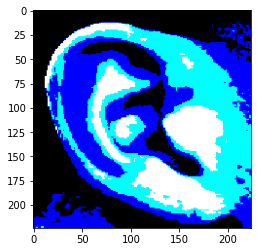

In [ ]:
plt.imshow(X_train[1])
# X_train[0]

In [ ]:
len(X_val)

192

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[callback, my_callback], validation_data=(X_val, y_val))

In [ ]:
pred = model.predict(X_test)

In [ ]:
predicted_test = [np.argmax(x) for x in pred]

In [ ]:
accuracy_score(y_test, predicted_test)

1.0

In [ ]:
y_test.max()

98

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_test)

# Plot confusion matrix
plt.figure(figsize=(15,15))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(0, 100))
plt.yticks(np.arange(0, 100))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
plt.imshow(X_test[53])

In [ ]:
plt.imshow(X_test[26])

In [ ]:
from datetime import datetime
now = datetime.now()
timestamp = now.strftime("%Y_%m_%d_%H_%M_%S")
trained_filename = f'./trained_weights_face_{timestamp}.h5'

In [ ]:
model.save_weights(trained_filename)

In [ ]:
!cp '/content/trained_weights_face_2023_03_02_04_51_58.h5' '/content/drive/MyDrive'

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
prediction = model.predict(X_train)

16/16 [==============================] - 3s 195ms/step


In [ ]:
np.savetxt("cnn_ear_softmax_2.txt", prediction)
np.savetxt("cnn_ear_labels_2.txt", y_train)